#  <font color='black'>Rahul Sunil Agrawal</font >
##     <font color='green'>TE COMP2 </font>
##  <font color='green'>TC202</font>

#  Titanic Dataset Preprocessing 

In [1]:
# Importing Libreries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

import seaborn as sns

from sklearn.metrics import confusion_matrix

In [2]:
# Loading Dataset

all_df = pd.read_csv('titanic.csv')

### Cleaning Data

In [3]:
# cheaking the dataset

all_df.shape

(891, 12)

In [4]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
all_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#  Unwanted column List

droping_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [7]:
#  make new dataframe with only important columns

df= all_df.drop(droping_columns,axis=1)

In [8]:
#  new dataframe rows*columns

df.shape

(891, 8)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
#    Get all Unique values of each column

for col in df:
    if(len(df[col].unique())>10):
        continue
    print(col)
    print(df[col].unique())
   

Survived
[0 1]
Pclass
[3 1 2]
Sex
['male' 'female']
SibSp
[1 0 3 4 2 5 8]
Parch
[0 1 2 5 3 4 6]
Embarked
['S' 'C' 'Q' nan]


In [11]:
#  Get Datatypes Of each Columns
dtype={}
for col in df:
    dtype[col]=df[col].dtypes
#     print(f'col={col} , Datatype=',df[col].dtypes)

dtype

{'Survived': dtype('int64'),
 'Pclass': dtype('int64'),
 'Sex': dtype('O'),
 'Age': dtype('float64'),
 'SibSp': dtype('int64'),
 'Parch': dtype('int64'),
 'Fare': dtype('float64'),
 'Embarked': dtype('O')}

In [12]:
#  Get total Null Values inside Columns and fill it with mean value of that column if dtype=int or float

nan_col=[]

for col in df:
    total=df[col].isnull().sum()
    if(total>0):
        print('col=',col,' Null values=',total , end='  ')
        if(dtype[col]!='O'):         #For int , float Datatype
            mean_value=df[col].mean()
            print("Filling Null Values With Mean=",mean_value)
            df[col].fillna(value=mean_value,inplace=True)
        else:
            print(f'col={col} has null values remaing due to dtype=Object')
            nan_col.append(col)
            
            

col= Age  Null values= 177  Filling Null Values With Mean= 29.69911764705882
col= Embarked  Null values= 2  col=Embarked has null values remaing due to dtype=Object


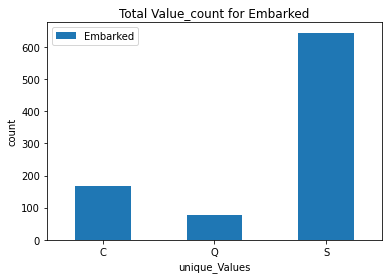

In [13]:
#  geting value count for each unique value for filling null values 
for i in nan_col:
    a=df[i].value_counts()
#     print('For col=',i,'\n',df[i].value_counts())
    total=0

    df[col].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count' , xlabel='unique_Values')
    plt.title(f"Total Value_count for {col}")
    plt.legend()
    plt.show()

In [14]:
# Filling Nan values with most occured Value i.e. "S"


df['Embarked'].fillna(value='S',inplace=True)

###  Preprocessing Data

In [15]:
d=df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [16]:
# Encoding Data i.e. Converting dtype Object to int

#  Get column name having object datatype

encode_col=[]
for j in dtype:
    if(dtype[j]=='object'):
        encode_col.append(j)
print('columns to be Encoded')
print(encode_col)

columns to be Encoded
['Sex', 'Embarked']


In [17]:
#  Prechecking values

print(d['Sex'].unique())
print(d['Sex'].value_counts())

['male' 'female']
male      577
female    314
Name: Sex, dtype: int64


In [18]:
#  As column 'Sex' having 2 catagories so we will use label encoding

df.replace(['female'],1,inplace=True)
df.replace(['male'],0,inplace=True)

print(d['Sex'].unique())
print(d['Sex'].value_counts())

[0 1]
0    577
1    314
Name: Sex, dtype: int64


In [19]:
#  For column 'Embarked' , we have more than 2 catagories so using one_hot encoding here

df=pd.get_dummies(df, columns = ['Embarked'])

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,0,0


In [21]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

###  Insights from Data

In [22]:
#  Co-Reletion Matrix

df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,0.168240,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.119224,-0.019336,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


[Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')]

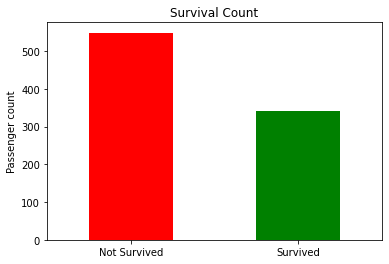

In [23]:
plt=df.Survived.value_counts().plot(kind='bar',rot=0,color=['r', 'g'])
plt.set_title("Survival Count")
# plt.set_xlabel('survived')
plt.set_ylabel('Passenger count')
plt.set_xticklabels(('Not Survived', 'Survived'))

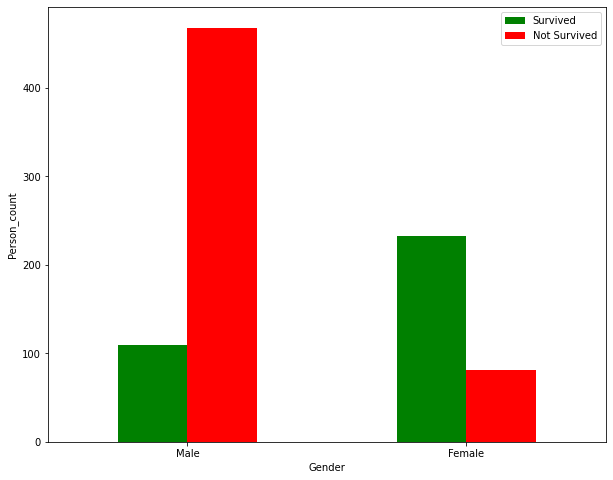

In [24]:
#   Male , Female Survival Count

ms=mns=fs=fns=0


for i in range(df.shape[0]):
    if df.Sex[i]==0:
        if (df['Survived'][i]==0):
            mns=mns+1
        else:
            ms=ms+1
    else:
        if (df.Survived==0)[i]:
            fns=fns+1
        else:
            fs=fs+1
Sex=["Male","Female"]
Survival={
    "Survived":[ms,fs],
    "Not Survived":[mns,fns]

}
ndf=pd.DataFrame(Survival,index=Sex)

ndf.plot(kind="bar",figsize=(10,8),rot=0,color=['g','r'],xlabel='Gender',ylabel='Person_count')
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

   

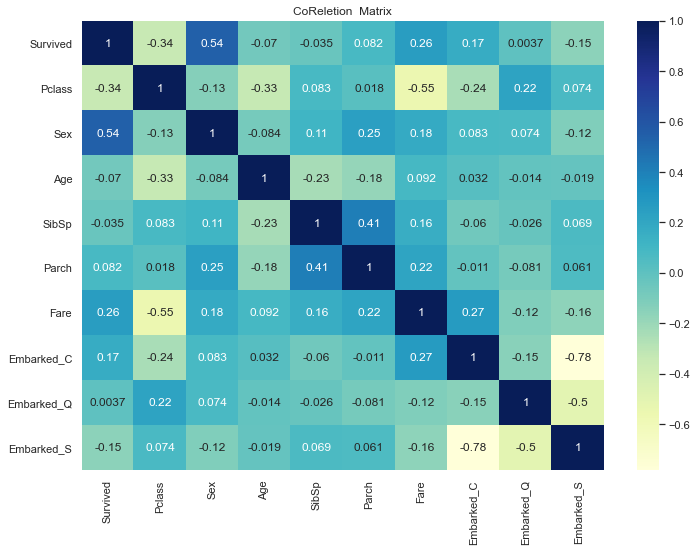

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True).set(title='CoReletion  Matrix')


In [26]:
df.to_csv('titanic_preprocessed.csv',index=False)